## Part 2 :

## Steps:

1. **Data Preparation:** 

Load the LES (Local Environmental Simulation) dataset into a data analysis tool such as Python (e.g., using pandas) or any other suitable environment.

2. **Explore the Dataset:**

Perform an exploratory data analysis (EDA) to understand the dataset. Use descriptive statistics, data visualization (e.g., histograms, scatter plots), and correlation heatmaps to examine the relationships between features.

3. **Choose a Label (Target Variable):**

Based on the EDA, choose a feature that has a high correlation or seems to have strong predictive potential. It doesn’t necessarily have to be precipitation; it could be any feature that seems meaningful to predict.

4. **Quantizing the Label:**

If the chosen label is continuous, consider discretizing it into categories (quantization). For example, if the label is temperature, you could divide it into categories like "low," "medium," and "high" using thresholds (e.g., 0-10°C as low, 11-20°C as medium, and so on).

5. **Handling Missing Data:**

Clean the dataset, addressing any missing values by using imputation methods or removing rows/columns with too many missing values.

6. **Feature Scaling:**

Standardize or normalize the features (especially for SVM), as Support Vector Machines are sensitive to the magnitude of the features.

7. **Train-Test Split:**

Split the data into training and testing sets (e.g., 70% for training, 30% for testing) to evaluate model performance later.

8. **Creating a Decision Tree Model:**

Use the Decision Tree Classifier from a machine learning library (e.g., scikit-learn in Python).
Train the decision tree model using the quantized label as the target variable and the remaining features as the input data.
Tune the hyperparameters of the decision tree, such as the depth of the tree, minimum samples per leaf, etc., if necessary.
Record the accuracy and other evaluation metrics (e.g., precision, recall, F1-score) on the test set.

9. **Create an SVM Model:**

Use the SVM classifier from the same library (e.g., scikit-learn).
Train the SVM model on the same dataset using the quantized label.
Choose an appropriate kernel (linear, polynomial, or RBF), and tune hyperparameters such as C and gamma.
Record the accuracy and other evaluation metrics on the test set.

10. **Compare Decision Tree and SVM:**

Compare the performance metrics of the Decision Tree and SVM (e.g., accuracy, precision, recall, F1-score).

#### Evaluate interpretability:
Decision Trees are generally more interpretable since you can visualize the tree and explain the decisions at each node.
SVM models, especially with nonlinear kernels, are harder to interpret due to the complexity of the decision boundary.

#### Compare generalization capabilities:
Decision Trees can overfit the data, especially if the tree is deep.
SVMs with the correct kernel and regularization tend to generalize better, especially in high-dimensional spaces.

#### Compare computational cost:
Decision Trees are generally faster to train, especially for large datasets.
SVMs, particularly with non-linear kernels, can be computationally expensive.


### Initializing neccessary libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: 
## Data Preparation
- Generate a synthetic dataset as given

In [5]:
# Load the dataset and skip the initial rows
file_path = r'/Users/shivpriyamane/Downloads/MI-14850-TRAVERSE_CITY_CHERRY_CPTL_AP/MI-14850-2011Fall-2012Spring.csv'
original_data = pd.read_csv(file_path, skiprows=8)

# Define column names
column_names = ['Date', 'Time', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 
                'Wind Direction (deg)', 'Peak Wind Gust (mph)', 'Low Cloud Ht (ft)', 
                'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 
                'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 
                'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)', 'Extra']

# Assign column names
original_data.columns = column_names

# Drop the 'Extra' column and handle summary rows
original_data.drop(columns=['Extra'], inplace=True)
original_data = original_data[original_data['Date'].str.match(r'\d{4}-\d{2}-\d{2}', na=False)]

# Convert relevant columns to numeric
numeric_columns = ['Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Atm Press (hPa)', 'Visibility (mi)', 'Precip (in)', 'Heat Index (F)']
original_data[numeric_columns] = original_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing 'Temp (F)' values
original_data.dropna(subset=['Temp (F)'], inplace=True)

# Fill remaining NaN values with 0
original_data.fillna(0, inplace=True)

## Step 2. Exploring the dataset & Our Key Labels to consider:

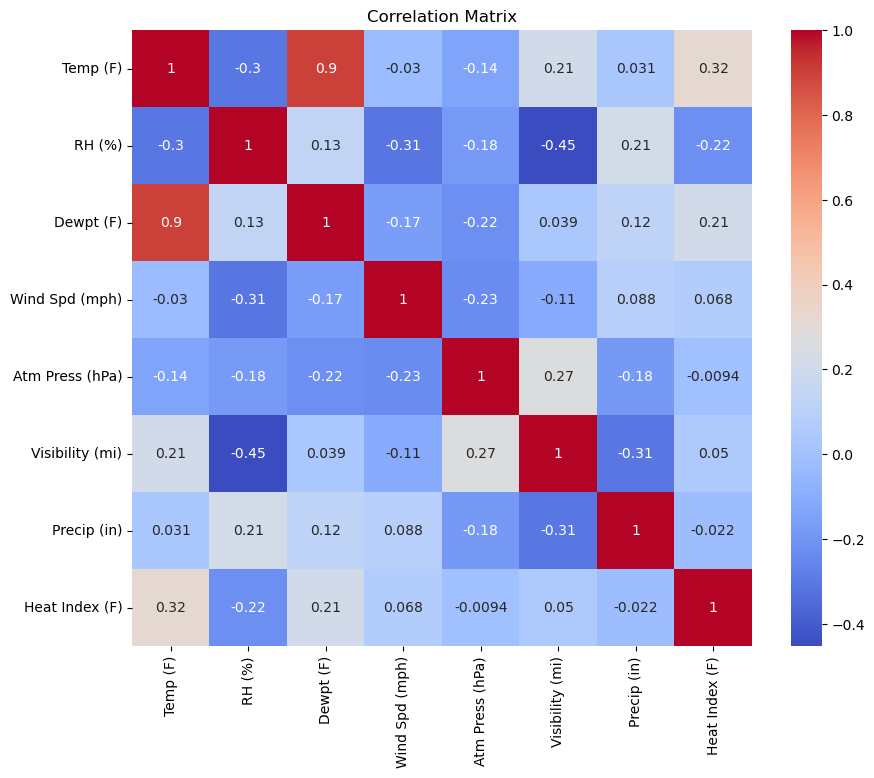

In [7]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(original_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


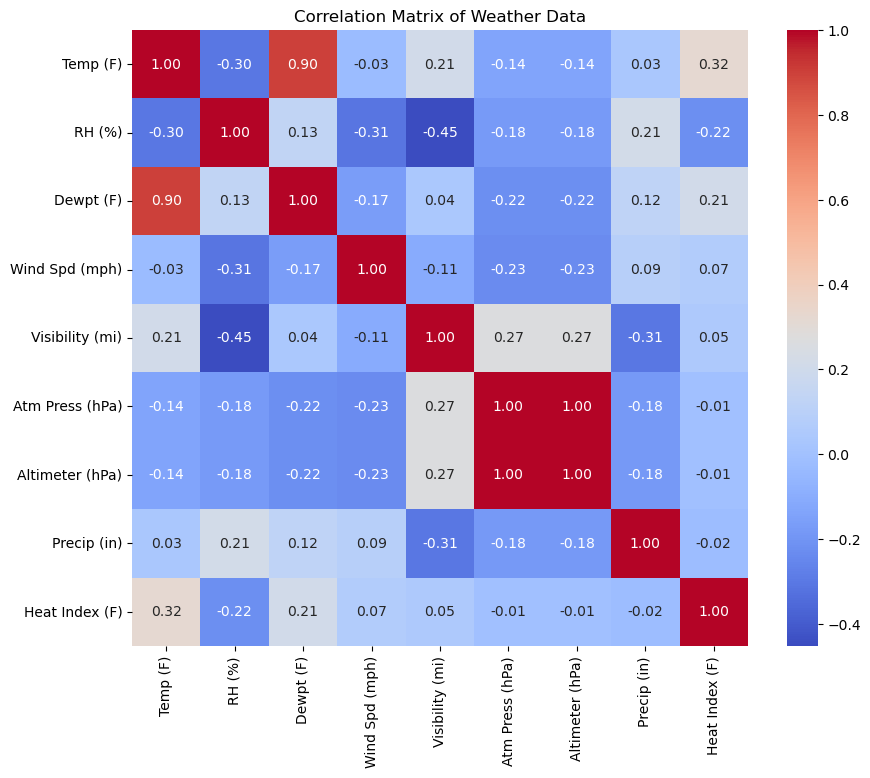

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert relevant columns to numeric
original_data['Temp (F)'] = pd.to_numeric(original_data['Temp (F)'], errors='coerce')
original_data['RH (%)'] = pd.to_numeric(original_data['RH (%)'], errors='coerce')
original_data['Wind Spd (mph)'] = pd.to_numeric(original_data['Wind Spd (mph)'], errors='coerce')
original_data['Atm Press (hPa)'] = pd.to_numeric(original_data['Atm Press (hPa)'], errors='coerce')

# Drop non-numeric columns, such as the date column (example: 'Date')
numeric_data = original_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Title and display
plt.title('Correlation Matrix of Weather Data')
plt.show()


`Temperature and Relative Humidity:` Inversely correlated  **(-0.29)**, meaning higher temperatures often correspond to **lower humidity**.
`Atmospheric Pressure and Altimeter:` Highly correlated **(1.00)**, as expected, as they are essentially the same measurement.
`Weak Correlations:` Other variables have **weak correlations**, suggesting limited direct relationships.


### **Temperature (Temp (F)):**
- Influenced by:
  - Humidity
  - Wind Speed
  - Cloud Height
  - Atmospheric Pressure

Since temperature is a key factor in many weather models and is influenced by various other features in our dataset, it is a strong candidate for prediction.

---

### **Relative Humidity (RH (%)):**
- Highly dependent on:
  - Temperature
  - Dew Point
  - Cloud Height

Relative humidity could be an interesting label to predict apart from just looking at temperature.

---

### **Wind Speed (Wind Spd (mph)):**
- Influenced by:
  - Atmospheric Pressure
  - Cloud Height
  - Wind Direction

Predicting wind speed can be valuable for environmental and climate models.


##### Prediction: 
`Temperature could be a good predictor for Relative Humidity due to their moderate negative correlation.`

## Step:3 Choosing Temperature as the key label for our analysis

Since temperature is a continuous label, I would like to think of it as high temperature, low temperature and medium temperature.We could also think of it as a categorizing them into multiple bins

## Understanding NULL values in the Temperature column

In [12]:
import pandas as pd
import numpy as np

# Sample DataFrame, assuming it's loaded as 'df'
# Convert all columns to numeric, non-numeric values will be coerced to NaN
original_data = original_data.apply(pd.to_numeric, errors='coerce')

# To view the updated DataFrame
print(original_data)


      Date  Time  Temp (F)  RH (%)  Dewpt (F)  Wind Spd (mph)  \
0      NaN   NaN      65.0    84.0       60.0             0.0   
1      NaN   NaN      62.0    89.0       59.0             0.0   
2      NaN   NaN      62.0    89.0       59.0             0.0   
3      NaN   NaN      61.0    93.0       59.0             0.0   
4      NaN   NaN      60.0    92.0       58.0             0.0   
...    ...   ...       ...     ...        ...             ...   
5107   NaN   NaN      41.0    73.0       33.0             3.0   
5108   NaN   NaN      41.0    73.0       33.0             0.0   
5109   NaN   NaN      41.0    70.0       32.0             6.0   
5110   NaN   NaN      40.0    73.0       32.0             0.0   
5111   NaN   NaN      39.0    75.0       32.0             0.0   

      Wind Direction (deg)  Peak Wind Gust (mph)  Low Cloud Ht (ft)  \
0                      0.0                   NaN                0.0   
1                      0.0                   NaN                0.0   
2     

In [13]:
# Checking for missing values in the 'Temp (F)' column
temp_missing_count = original_data['Temp (F)'].isnull().sum()
temp_missing_percentage = (temp_missing_count / len(original_data)) * 100

# Create a DataFrame to display the results
temp_missing_summary = pd.DataFrame({
    'Missing Values': [temp_missing_count],
    'Percentage': [temp_missing_percentage]
}, index=['Temp (F)'])

print(temp_missing_summary)


          Missing Values  Percentage
Temp (F)               0         0.0


In [14]:
import pandas as pd
import numpy as np


import pandas as pd

# Coerce non-numeric values in the 'Temp (F)' column to NaN
original_data['Temp (F)'] = pd.to_numeric(original_data['Temp (F)'], errors='coerce')

# Check for null values in the 'Temp (F)' column again
null_values = original_data['Temp (F)'].isnull()
print(f"Total rows: {len(original_data)}")
print(f"Number of null values in 'Temp (F)' after coercion: {null_values.sum()}")

# Count the non-null values in the 'Temp (F)' column after coercion
non_null_count = original_data['Temp (F)'].count()
print(f"Number of non-null values in 'Temp (F)': {non_null_count}")

# Drop rows where 'Temp (F)' has NaN values
cleaned_data = original_data.dropna(subset=['Temp (F)'])

# Print the cleaned dataset size
print(f"Rows remaining after removing NaNs: {len(cleaned_data)}")

# Replace NaN values with 0.0 in the entire DataFrame
original_data.fillna(0.0, inplace=True)

original_data

Total rows: 5110
Number of null values in 'Temp (F)' after coercion: 0
Number of non-null values in 'Temp (F)': 5110
Rows remaining after removing NaNs: 5110


,Date,Time,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust (mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,0.0,0.0,65.0,84.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,992.3,1015.0,1015.2,0.0,0.0,0.0
1,0.0,0.0,62.0,89.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,992.3,1014.8,1015.2,0.0,0.0,0.0
2,0.0,0.0,62.0,89.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,992.0,1014.8,1014.9,0.0,0.0,0.0
3,0.0,0.0,61.0,93.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,992.0,1014.7,1014.9,0.0,0.0,0.0
4,0.0,0.0,60.0,92.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,992.0,1014.8,1014.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0.0,0.0,41.0,73.0,33.0,3.0,310.0,0.0,3500.0,20000.0,0.0,10.0,989.0,1012.4,1011.9,0.0,0.0,0.0
5108,0.0,0.0,41.0,73.0,33.0,0.0,0.0,0.0,20000.0,0.0,0.0,10.0,988.3,1011.8,1011.2,0.0,0.0,0.0
5109,0.0,0.0,41.0,70.0,32.0,6.0,0.0,0.0,0.0,0.0,0.0,10.0,987.0,1010.4,1009.8,0.0,37.0,0.0
5110,0.0,0.0,40.0,73.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,987.3,1010.6,1010.2,0.0,0.0,0.0


## Dropping Rows with Missing Values

In [16]:
#Since the number of missing values are relatively low,we can just drop
# Drop rows with missing values in 'Temp (F)'
original_data = original_data.dropna(subset=['Temp (F)'])
original_data

,Date,Time,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust (mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,0.0,0.0,65.0,84.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,992.3,1015.0,1015.2,0.0,0.0,0.0
1,0.0,0.0,62.0,89.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,992.3,1014.8,1015.2,0.0,0.0,0.0
2,0.0,0.0,62.0,89.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,992.0,1014.8,1014.9,0.0,0.0,0.0
3,0.0,0.0,61.0,93.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,992.0,1014.7,1014.9,0.0,0.0,0.0
4,0.0,0.0,60.0,92.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,992.0,1014.8,1014.9,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0.0,0.0,41.0,73.0,33.0,3.0,310.0,0.0,3500.0,20000.0,0.0,10.0,989.0,1012.4,1011.9,0.0,0.0,0.0
5108,0.0,0.0,41.0,73.0,33.0,0.0,0.0,0.0,20000.0,0.0,0.0,10.0,988.3,1011.8,1011.2,0.0,0.0,0.0
5109,0.0,0.0,41.0,70.0,32.0,6.0,0.0,0.0,0.0,0.0,0.0,10.0,987.0,1010.4,1009.8,0.0,37.0,0.0
5110,0.0,0.0,40.0,73.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,987.3,1010.6,1010.2,0.0,0.0,0.0


## Step:4 Quantizing the temperature label

### Define Bins
Categorizing the temperature data into "Cold," "Moderate," and "Hot" by defining Bins:

- **Cold:** Less than 60°F
- **Moderate:** 60°F to 75°F
- **Hot:** More than 75°F




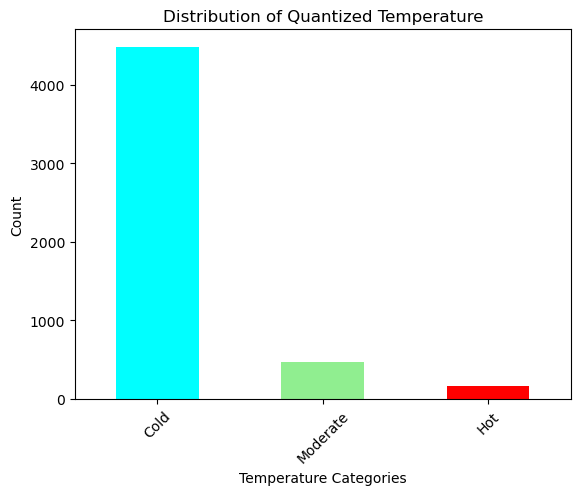

In [18]:
# Quantize temperature into categories
bins = [-float('inf'), 60, 75, float('inf')]
labels = ['Cold', 'Moderate', 'Hot']
original_data['Temp_Quantized'] = pd.cut(original_data['Temp (F)'], bins=bins, labels=labels)

# Check distribution
original_data['Temp_Quantized'].value_counts().plot(kind='bar', color=['cyan', 'lightgreen', 'red'])
plt.title('Distribution of Quantized Temperature')
plt.xlabel('Temperature Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Visualizing the distribution of the quantized labels

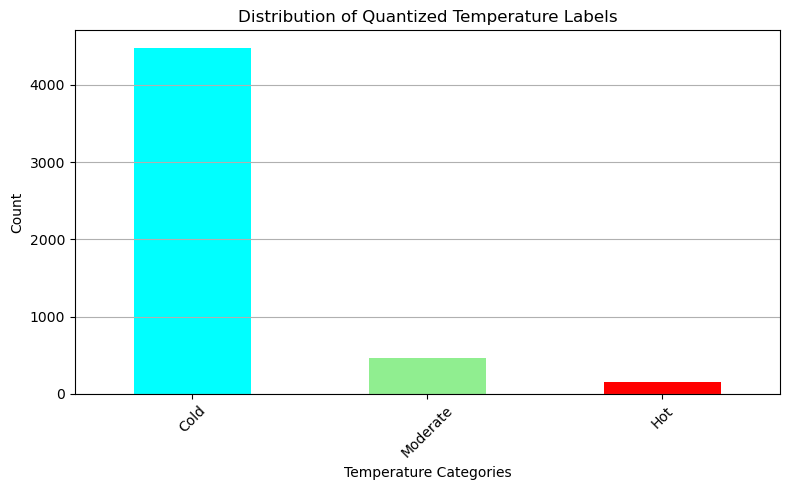

In [20]:
# Check the distribution of the quantized labels
quantized_counts = original_data['Temp_Quantized'].value_counts()

#Distribution using a bar chart
plt.figure(figsize=(8, 5))
quantized_counts.plot(kind='bar', color=['cyan', 'lightgreen', 'red'])
plt.title('Distribution of Quantized Temperature Labels')
plt.xlabel('Temperature Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

### Checking if we can establish good relationships with new features

In [22]:
import pandas as pd
import numpy as np

# Step 1: Load the DataFrame (assuming it's already cleaned)
# original_data = pd.read_csv('path_to_your_data.csv')

# Create interaction features
original_data['RH_Temp_Interaction'] = original_data['RH (%)'] * original_data['Temp (F)']
original_data['Dewpt_WindSpd_Interaction'] = original_data['Dewpt (F)'] * original_data['Wind Spd (mph)']
original_data['HeatIndex_Visibility'] = original_data['Heat Index (F)'] / (original_data['Visibility (mi)'] + 1)# Avoiding division by zero

# Optionally create polynomial features (for example, square of temperature)
original_data['Temp_Squared'] = original_data['Temp (F)'] ** 2

# Display the first few rows with new features
original_data


,Date,Time,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust (mph),Low Cloud Ht (ft),Med Cloud Ht (ft),...,Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),Temp_Quantized,RH_Temp_Interaction,Dewpt_WindSpd_Interaction,HeatIndex_Visibility,Temp_Squared
0,0.0,0.0,65.0,84.0,60.0,0.0,0.0,0.0,0.0,0.0,...,1015.0,1015.2,0.0,0.0,0.0,Moderate,5460.0,0.0,0.0,4225.0
1,0.0,0.0,62.0,89.0,59.0,0.0,0.0,0.0,0.0,0.0,...,1014.8,1015.2,0.0,0.0,0.0,Moderate,5518.0,0.0,0.0,3844.0
2,0.0,0.0,62.0,89.0,59.0,0.0,0.0,0.0,0.0,0.0,...,1014.8,1014.9,0.0,0.0,0.0,Moderate,5518.0,0.0,0.0,3844.0
3,0.0,0.0,61.0,93.0,59.0,0.0,0.0,0.0,0.0,0.0,...,1014.7,1014.9,0.0,0.0,0.0,Moderate,5673.0,0.0,0.0,3721.0
4,0.0,0.0,60.0,92.0,58.0,0.0,0.0,0.0,0.0,0.0,...,1014.8,1014.9,0.0,0.0,0.0,Cold,5520.0,0.0,0.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0.0,0.0,41.0,73.0,33.0,3.0,310.0,0.0,3500.0,20000.0,...,1012.4,1011.9,0.0,0.0,0.0,Cold,2993.0,99.0,0.0,1681.0
5108,0.0,0.0,41.0,73.0,33.0,0.0,0.0,0.0,20000.0,0.0,...,1011.8,1011.2,0.0,0.0,0.0,Cold,2993.0,0.0,0.0,1681.0
5109,0.0,0.0,41.0,70.0,32.0,6.0,0.0,0.0,0.0,0.0,...,1010.4,1009.8,0.0,37.0,0.0,Cold,2870.0,192.0,0.0,1681.0
5110,0.0,0.0,40.0,73.0,32.0,0.0,0.0,0.0,0.0,0.0,...,1010.6,1010.2,0.0,0.0,0.0,Cold,2920.0,0.0,0.0,1600.0


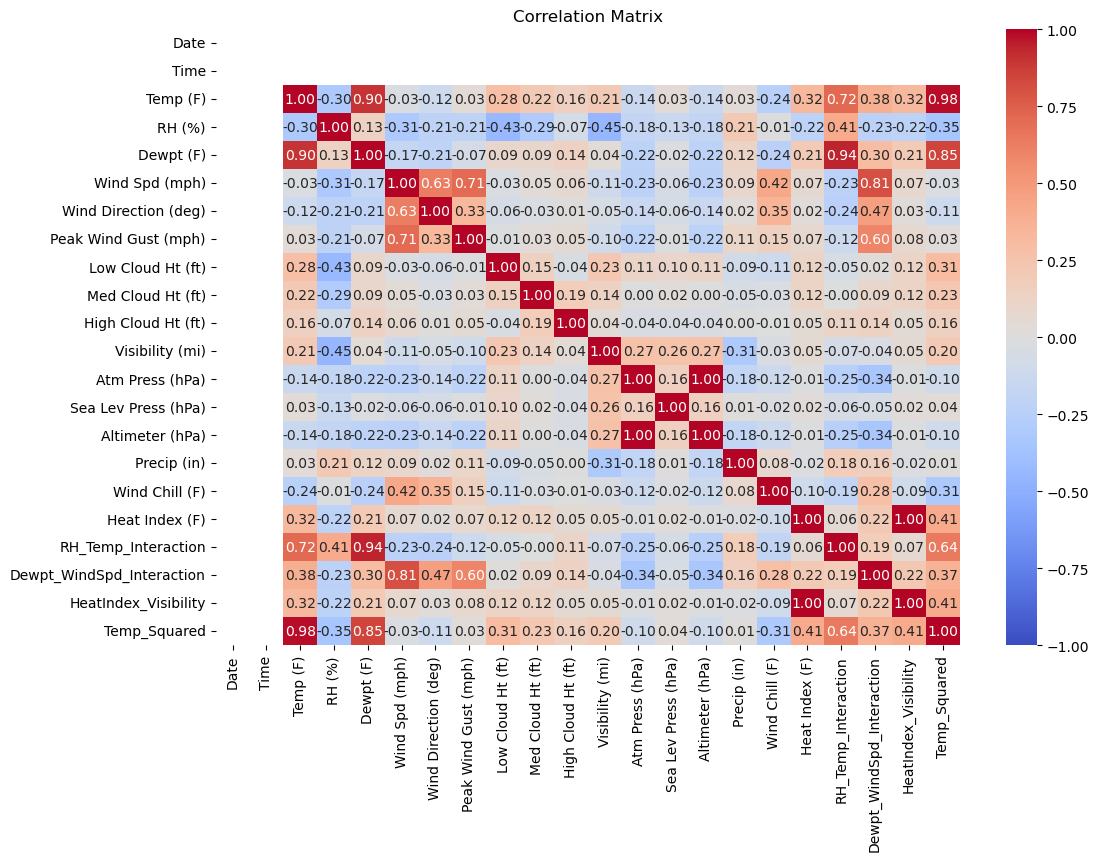

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_data = original_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Feature Selection for Decision Tree:

Decision trees are generally less sensitive to multicollinearity (high correlation between features) compared to other algorithms. However, selecting features with strong correlations to the target variable can improve model performance.

Potential features for Decision Tree:

Temp (F): High correlation with the target variable suggests it's a strong predictor.
Dewpt (F): Also highly correlated, indicating its importance.
Wind Spd (mph): While less correlated than Temp and Dewpt, it might still contribute significantly.
RH (%): Could be relevant due to its moderate correlation.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
features = [ 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Heat Index (F)', 'Visibility (mi)', 'Precip (in)', 
            'RH_Temp_Interaction', 'Dewpt_WindSpd_Interaction', 'HeatIndex_Visibility']
target = 'Temp_Quantized'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(original_data[features], original_data[target], test_size=0.3, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Decision Tree - Classification Report
              precision    recall  f1-score   support

        Cold       0.99      0.99      0.99      1346
         Hot       0.77      0.94      0.85        51
    Moderate       0.91      0.85      0.87       136

    accuracy                           0.98      1533
   macro avg       0.89      0.93      0.91      1533
weighted avg       0.98      0.98      0.98      1533

Decision Tree - Accuracy: 0.9765166340508806


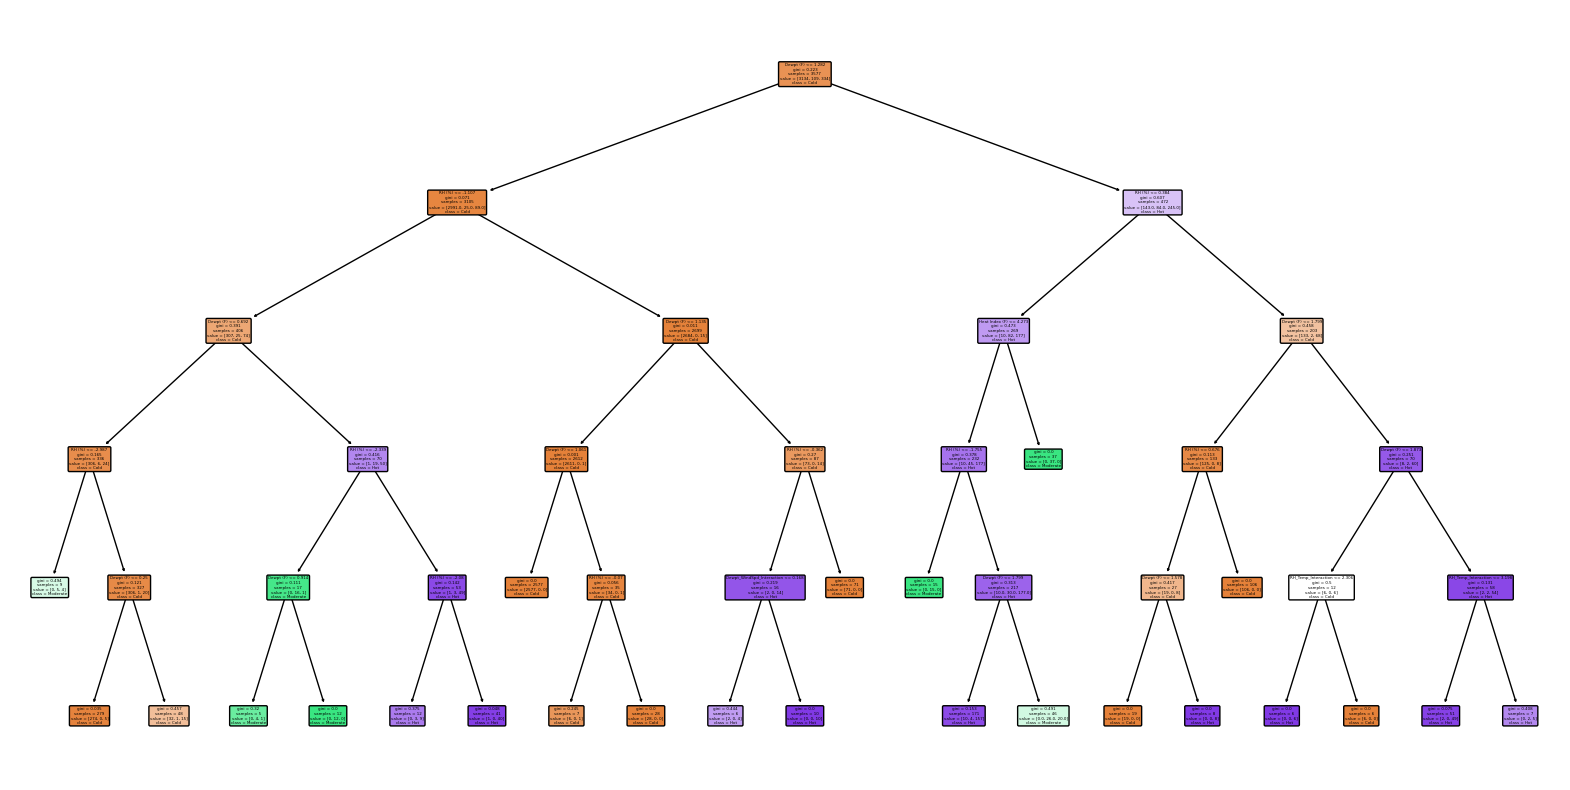

In [26]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the Decision Tree model
clf_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

clf_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = clf_tree.predict(X_test)
print("Decision Tree - Classification Report")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_tree))

# Plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf_tree, filled=True, rounded=True, feature_names=features, class_names=labels)
plt.show()


In [27]:
from sklearn.svm import SVC

# Train the SVM model
clf_svm = SVC(kernel='rbf', C=0.1, random_state=42)  # Lower C value to avoid overfitting

clf_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = clf_svm.predict(X_test)
print("SVM - Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM - Classification Report
              precision    recall  f1-score   support

        Cold       0.98      1.00      0.99      1346
         Hot       1.00      0.45      0.62        51
    Moderate       0.80      0.82      0.81       136

    accuracy                           0.96      1533
   macro avg       0.93      0.75      0.81      1533
weighted avg       0.96      0.96      0.96      1533

SVM - Accuracy: 0.9634703196347032


===== Decision Tree Evaluation =====
Decision Tree - Classification Report
              precision    recall  f1-score   support

        Cold       0.99      0.99      0.99      1346
         Hot       0.77      0.94      0.85        51
    Moderate       0.91      0.85      0.87       136

    accuracy                           0.98      1533
   macro avg       0.89      0.93      0.91      1533
weighted avg       0.98      0.98      0.98      1533

Decision Tree - Accuracy: 0.9765166340508806

===== SVM Evaluation =====
SVM - Classification Report
              precision    recall  f1-score   support

        Cold       0.98      1.00      0.99      1346
         Hot       1.00      0.45      0.62        51
    Moderate       0.80      0.82      0.81       136

    accuracy                           0.96      1533
   macro avg       0.93      0.75      0.81      1533
weighted avg       0.96      0.96      0.96      1533

SVM - Accuracy: 0.9634703196347032


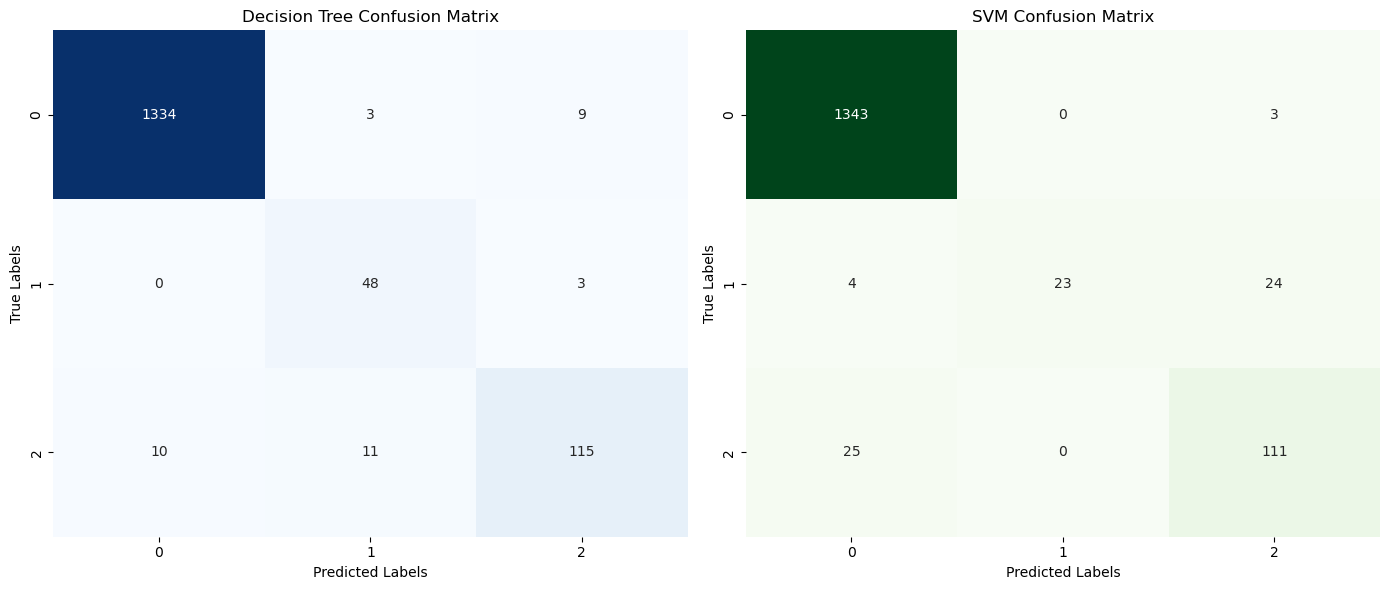

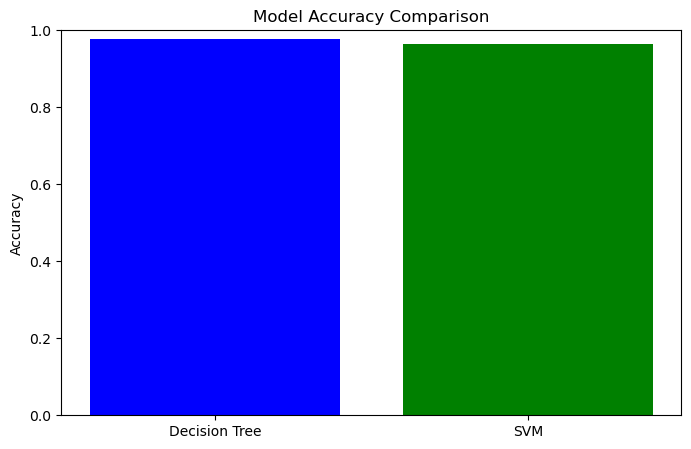

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Decision Tree Evaluation
print("===== Decision Tree Evaluation =====")
print("Decision Tree - Classification Report")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_tree))

# SVM Evaluation
print("\n===== SVM Evaluation =====")
print("SVM - Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))

# Visualize Confusion Matrices for Decision Tree and SVM

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title("Decision Tree Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=ax[1], cbar=False)
ax[1].set_title("SVM Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

# Visualize Accuracy for Both Models using a Bar Chart
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

plt.figure(figsize=(8, 5))
plt.bar(['Decision Tree', 'SVM'], [accuracy_tree, accuracy_svm], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Conclusion



The results from the **Decision Tree** and **SVM** models provide valuable insights into their performance across different classes (`Cold`, `Hot`, and `Moderate`). Here's a breakdown of the performance metrics and the final conclusion:

### 1. **Accuracy**:
- **Decision Tree Accuracy**: 97.65%
- **SVM Accuracy**: 96.35%

While both models achieve high accuracy, the **Decision Tree** slightly outperforms the **SVM** in terms of overall accuracy. However, accuracy alone doesn't provide a full picture, especially when classes are imbalanced.

### 2. **Class-Level Performance**:
#### **Cold** Class:
- Both models perform **extremely well** on the **Cold** class, with precision and recall around **99-100%**.
- The **SVM** performs slightly worse in terms of recall compared to the Decision Tree, but this difference is marginal.

#### **Hot** Class:
- **Decision Tree**: Performs well on the **Hot** class, with a **precision of 77%** and a high **recall of 94%**. This means that the Decision Tree correctly identifies most of the "Hot" instances (few false negatives).
- **SVM**: The SVM struggles with the **Hot** class, achieving a **precision of 100%** but only a **recall of 45%**, meaning it identifies far fewer instances of "Hot" (many false negatives). This suggests that while the SVM is precise, it's missing many "Hot" examples, leading to a low F1-score for this class.

#### **Moderate** Class:
- **Decision Tree**: Performs slightly better on the **Moderate** class, with a **precision of 91%** and **recall of 85%**, giving an overall **F1-score of 87%**.
- **SVM**: Also performs reasonably well, with a **precision of 80%** and **recall of 82%**, giving a similar **F1-score of 81%**. The SVM performs well but slightly worse than the Decision Tree on this class.



### 3. **Class Imbalance**:
- The **Cold** class dominates the dataset, with 1346 samples out of 1533 total. Both models do very well on this class because of its dominance, but the real test lies in how they handle the minority classes, **Hot** (51 samples) and **Moderate** (136 samples).
- The **Decision Tree** handles the class imbalance better by achieving a higher recall for the **Hot** class, while the **SVM** struggles with this class.

### Final Conclusion:
- **Decision Tree**: This model performs better overall, especially on the minority class **Hot**, with higher recall and a better balance between precision and recall across all classes. Its overall accuracy is slightly higher, and it handles the imbalanced dataset more effectively.
  
- **SVM**: The SVM is very precise, especially for the **Hot** class, but its low recall for this class suggests that it's missing many "Hot" instances. This leads to a lower F1-score and macro average for the SVM compared to the Decision Tree.

